100%|██████████| 172k/172k [00:00<00:00, 512kB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Files found:
WA_Fn-UseC_-Telco-Customer-Churn.csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   


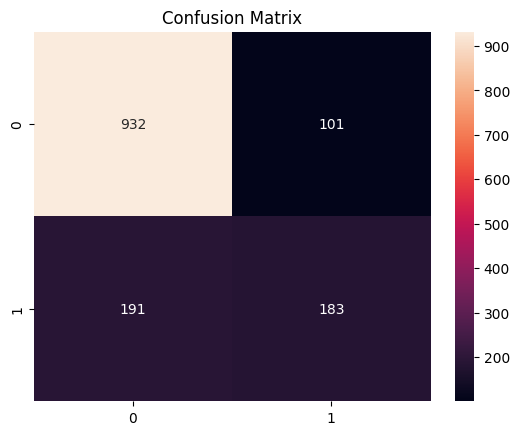

In [1]:
# churn_prediction.ipynb

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset
import kagglehub
import os

# Step 1: Download the dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# Step 2: List files inside the dataset folder
print("Downloaded to:", path)
print("Files found:")

for file in os.listdir(path):
    print(file)
df=pd.read_csv(path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
 # Download from Kaggle

# 3. Data overview
print(df.head())
print(df.info())

# 4. Clean the data
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 5. Split data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8. Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
